# Logistic Regression Notebook

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics

## Testing for initial hypothesis LeaveOrNot ~ Gender + EverBenched + PaymentTier

In [114]:
employee = pd.read_csv("../data/employee_cleaned.csv")

## Encoding Categories via panda dummy variables

In [115]:
employee = pd.get_dummies(employee, columns=["Gender", "EverBenched","PaymentTier"])
employee = employee.drop(columns=['Age', 'Education', 'ExperienceInCurrentDomain','City','JoiningYear','Duration'])

## Partition Data prior to training model

In [116]:
X = employee.loc[:, employee.columns != 'LeaveOrNot']
X = sm.add_constant(X)
y = employee.loc[:, employee.columns == 'LeaveOrNot']

/Users/ivan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=7)

<AxesSubplot:xlabel='LeaveOrNot', ylabel='count'>

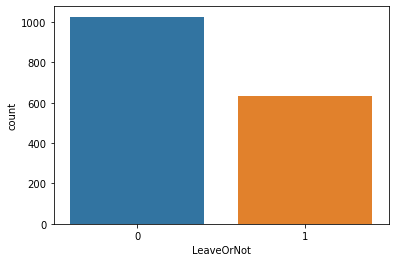

In [118]:
sns.countplot(x="LeaveOrNot", data = y_train)

<AxesSubplot:xlabel='LeaveOrNot', ylabel='count'>

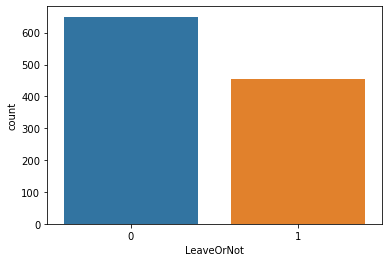

In [119]:
sns.countplot(x="LeaveOrNot", data = y_test)

## Executing Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression().fit(X_train, y_train.values.ravel())

## Predicting Values and Evaluating Metrics

In [121]:
y_pred = logReg.predict(X_test)
ypred = pd.crosstab(y_test['LeaveOrNot'], y_pred, rownames=['Actual'], colnames=['Predicted'])
ypred['Total'] = ypred.sum(axis=1);
ypred.loc['Total'] = ypred.sum()
print(ypred)

Predicted    0    1  Total
Actual                    
0          599   51    650
1          351  105    456
Total      950  156   1106


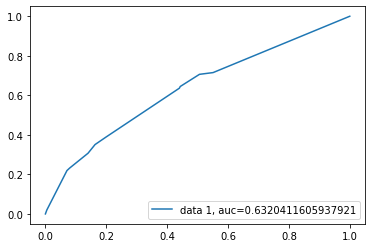

In [122]:
y_pred_proba = logReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [123]:
TP = ypred[1][1]
TN = ypred[0][0]
FP = ypred[1][0]
FN = ypred[0][1]
TAN = TN + FP
TAP = FN + TP
TPN = TN + FN
TPP = FP + TP
GT = ypred['Total']['Total']

In [124]:
from tabulate import tabulate

In [125]:
accuracy = round((TN + TP) / GT, 4)
sensitivity = round(TP / TAP, 4)
specificity = round(TN / TAN, 4)
precision = round(TP / TPP, 4)
recall = round(TP / (TP + FN), 4)
pxr = precision * recall
ppr = precision + recall
F1 = round((pxr / ppr) * 2, 4)
F2 = round((pxr / ((4 * precision) + recall)) * 5, 4)
F05 = round((pxr / ((0.25 * precision) + recall)) * 1.25, 4)

In [126]:
data = [["Accuracy", "(TN+TP)/GT", accuracy], ["Error rate", "1-Accuracy", 1 - accuracy],
        ["Sensitivity = Recall", "TP/TAP", sensitivity], ["Specificity", "TN/TAN", specificity],
        ["Precision", "TP/TPP", precision], ["F1", "2*(precision*recall)/(precision+recall)", F1],
        ["F2", "5*(precision*recall)/((4*precision)+recall)", F2],
        ["F0.5", "1.25*(precision*recall)/((0.25*precision)+recall)", F05]]
col_names = ["Evaluation Measure", "Formula", "Value"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒══════════════════════╤═══════════════════════════════════════════════════╤═════════╕
│ Evaluation Measure   │ Formula                                           │   Value │
╞══════════════════════╪═══════════════════════════════════════════════════╪═════════╡
│ Accuracy             │ (TN+TP)/GT                                        │  0.6365 │
├──────────────────────┼───────────────────────────────────────────────────┼─────────┤
│ Error rate           │ 1-Accuracy                                        │  0.3635 │
├──────────────────────┼───────────────────────────────────────────────────┼─────────┤
│ Sensitivity = Recall │ TP/TAP                                            │  0.2303 │
├──────────────────────┼───────────────────────────────────────────────────┼─────────┤
│ Specificity          │ TN/TAN                                            │  0.9215 │
├──────────────────────┼───────────────────────────────────────────────────┼─────────┤
│ Precision            │ TP/TPP            

## Testing for alt hypothesis LeaveOrNot ~ City + Gender + Duration + PaymentTier

In [127]:
employee = pd.read_csv("../data/employee_cleaned.csv")

## Encoding Categories via panda dummy variables

In [128]:
employee = pd.get_dummies(employee, columns=["City","Gender","Duration", "PaymentTier"])
employee = employee.drop(columns = ['Age','Education','EverBenched','ExperienceInCurrentDomain', 'JoiningYear'])

## Partition Data prior to training model

In [129]:
X = employee.loc[:, employee.columns != 'LeaveOrNot']
X = sm.add_constant(X)
y = employee.loc[:, employee.columns == 'LeaveOrNot']

/Users/ivan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=7)

## Validating Partition

<AxesSubplot:xlabel='LeaveOrNot', ylabel='count'>

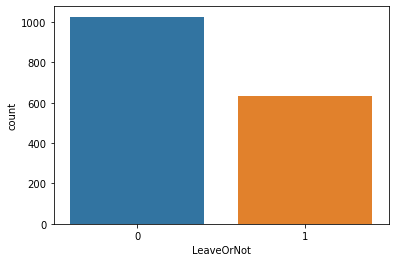

In [131]:
sns.countplot(x="LeaveOrNot", data = y_train)

<AxesSubplot:xlabel='LeaveOrNot', ylabel='count'>

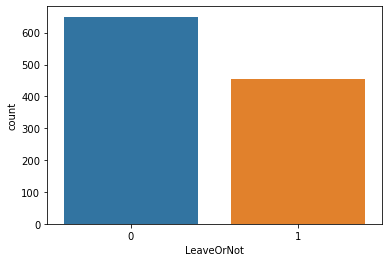

In [132]:
sns.countplot(x="LeaveOrNot", data = y_test)

## Executing Logistic Regression

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
logReg = LogisticRegression().fit(X_train, y_train.values.ravel())

## Predicting Values and Evaluating Metrics

In [135]:
y_pred = logReg.predict(X_test)

In [136]:
ypred = pd.crosstab(y_test['LeaveOrNot'], y_pred, rownames = ['Actual'], colnames = ['Predicted'])
ypred['Total'] = ypred.sum(axis=1); ypred.loc['Total'] = ypred.sum()
print(ypred)

Predicted    0    1  Total
Actual                    
0          589   61    650
1          227  229    456
Total      816  290   1106


In [137]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7396021699819169
Precision: 0.7896551724137931
Recall: 0.5021929824561403


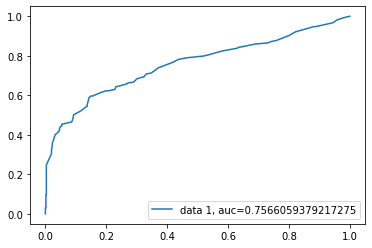

In [138]:
y_pred_proba = logReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [139]:
TP = ypred[1][1]
TN = ypred[0][0]
FP = ypred[1][0]
FN = ypred[0][1]
TAN = TN + FP
TAP = FN + TP
TPN = TN + FN
TPP = FP + TP
GT = ypred['Total']['Total']

In [140]:

from tabulate import tabulate

In [141]:
accuracy = round((TN + TP) / GT, 4)
sensitivity = round(TP / TAP, 4)
specificity = round(TN / TAN, 4)
precision = round(TP / TPP, 4)
recall = round(TP / (TP + FN), 4)
pxr = precision * recall
ppr = precision + recall
F1 = round((pxr / ppr) * 2, 4)
F2 = round((pxr / ((4 * precision) + recall)) * 5, 4)
F05 = round((pxr / ((0.25 * precision) + recall)) * 1.25, 4)

In [142]:
data = [["Accuracy", "(TN+TP)/GT", accuracy], ["Error rate", "1-Accuracy", 1 - accuracy],
        ["Sensitivity = Recall", "TP/TAP", sensitivity], ["Specificity", "TN/TAN", specificity],
        ["Precision", "TP/TPP", precision], ["F1", "2*(precision*recall)/(precision+recall)", F1],
        ["F2", "5*(precision*recall)/((4*precision)+recall)", F2],
        ["F0.5", "1.25*(precision*recall)/((0.25*precision)+recall)", F05]]
col_names = ["Evaluation Measure", "Formula", "Value"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒══════════════════════╤═══════════════════════════════════════════════════╤═════════╕
│ Evaluation Measure   │ Formula                                           │   Value │
╞══════════════════════╪═══════════════════════════════════════════════════╪═════════╡
│ Accuracy             │ (TN+TP)/GT                                        │  0.7396 │
├──────────────────────┼───────────────────────────────────────────────────┼─────────┤
│ Error rate           │ 1-Accuracy                                        │  0.2604 │
├──────────────────────┼───────────────────────────────────────────────────┼─────────┤
│ Sensitivity = Recall │ TP/TAP                                            │  0.5022 │
├──────────────────────┼───────────────────────────────────────────────────┼─────────┤
│ Specificity          │ TN/TAN                                            │  0.9062 │
├──────────────────────┼───────────────────────────────────────────────────┼─────────┤
│ Precision            │ TP/TPP            